In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c1-pnadc/PNADc2016.csv
/kaggle/input/c1-pnadc/PNADc2019.csv
/kaggle/input/c1-pnadc/PNADc2018.csv
/kaggle/input/c1-pnadc/PNADc2017.csv


# Preparando dados

In [2]:
# LEGENDAS

"V2007", # Sexo
"V2009"  # Idade do morador na data de referência
"V2010"  # Cor/raça
"V3003A" # Qual é o curso que frequenta atualmente 
"V3001"  # Sabe ler e escrever
"VD4001" # Economicamente ativa/não (Força de trabalho)
"VD4002" # Ocupadas/ não ocupadas - não incluso
"VD4020" # Redimentos mensal de trabalho
"VD5002" # Renda domiciliar per capita - não incluso
"V4010"  # Profissão principa(função, cargo)
"V3009A" # Qual é o curso mais elevado que já frequentou

'V3009A'

In [3]:
df_2016 = pd.read_csv('../input/c1-pnadc/PNADc2016.csv')
df_2017 = pd.read_csv('../input/c1-pnadc/PNADc2017.csv')
df_2018 = pd.read_csv('../input/c1-pnadc/PNADc2018.csv')
df_2019 = pd.read_csv('../input/c1-pnadc/PNADc2019.csv')

In [4]:
df_2019.columns

Index(['Unnamed: 0', 'Ano', 'Trimestre', 'UF', 'UPA', 'Estrato', 'V1008',
       'V1030', 'V1031', 'posest', 'V2003', 'V2007', 'V2009', 'V2010', 'V3001',
       'V3003A', 'V3009A', 'V4010', 'V4041', 'VD4001', 'VD4002', 'VD4020',
       'VD5002', 'CO1', 'CO1e', 'CO2', 'CO2e', 'CO3'],
      dtype='object')

In [5]:
deletar = ['Unnamed: 0',
           'Trimestre',
           'UPA',
           'Estrato',
           'V1008',
           'V1030',
           "VD5002",
           'V1031',
           'V4041',
           'posest',
           'V2003', 
           'CO1',
           'CO1e',
           'CO2',
           'CO2e',
           'CO3']

df_2016 = df_2016.drop(deletar, axis=1)
df_2017 = df_2017.drop(deletar, axis=1)
df_2018 = df_2018.drop(deletar, axis=1)
df_2019 = df_2019.drop(deletar, axis=1)

In [6]:
df_2019.columns

Index(['Ano', 'UF', 'V2007', 'V2009', 'V2010', 'V3001', 'V3003A', 'V3009A',
       'V4010', 'VD4001', 'VD4002', 'VD4020'],
      dtype='object')

In [7]:
nome = ['Ano',    #Ano
        'UF',     #UF
        'Sexo',   #V2007
        'Idade',  #V2009 
        'Cor',    #V2010
        'Le/escreve',      #V3001
        'Educação atual',  #V3003A 
        'Educação feita',  #V3009A 
        'Profissao',       #V4010
        'Economicamente ativa/não',  #VD4001
        'Ocupado/não',               #VD4002
        'Redimentos de trabalho']    #VD4020


df_2016.columns = nome
df_2017.columns = nome
df_2018.columns = nome
df_2019.columns = nome

# Construindo dataframe para análises

In [8]:
df = pd.concat([df_2016, df_2017, df_2018, df_2019])

**Checking dataframe shape**

In [9]:
df.shape[0] == df_2016.shape[0]+df_2017.shape[0]+df_2018.shape[0]+df_2019.shape[0]

True

# Funções

In [10]:
def idade(dataframe):

    idade = dataframe['Idade'].to_list()

    i10=np.percentile(idade,10)
    i20=np.percentile(idade,20)
    i25=np.percentile(idade,25)
    i30=np.percentile(idade,30)
    i40=np.percentile(idade,40)
    i50=np.percentile(idade,50)
    i60=np.percentile(idade,60)
    i70=np.percentile(idade,70)
    i80=np.percentile(idade,80)
    i90=np.percentile(idade,90)
    i95=np.percentile(idade,95)
    i99=np.percentile(idade,99)

    print('\033[1m' +"\nDistribuição da idade da população "+ str(dataframe['Cor'][0])+ '\033[0m')

    print("\n10th Percentile: ",i10)
    #print("\n20th Percentile: ",i20)
    #print("\n25th Percentile: ",i25)
    print("\n30th Percentile: ",i30)
    #print("\n40th Percentile: ",i40)
    print("\n50th Percentile: ",i50)
    #print("\n60th Percentile: ",i60)
    #print("\n70th Percentile: ",i70)
    #print("\n80th Percentile: ",i80)
    #print("\n90th Percentile: ",i90)
    print("\n95th Percentile: ",i95)
    print("\n99th Percentile: ",i99)

In [11]:
def rend(dataframe):
    
    rend = dataframe['Redimentos de trabalho'].dropna().to_list()

    rp10=np.percentile(rend,10)
    rp20=np.percentile(rend,20)
    rp25=np.percentile(rend,25)
    rp30=np.percentile(rend,30)
    rp40=np.percentile(rend,40)
    rp50=np.percentile(rend,50)
    rp60=np.percentile(rend,60)
    rp70=np.percentile(rend,70)
    rp80=np.percentile(rend,80)
    rp90=np.percentile(rend,90)
    rp95=np.percentile(rend,95)
    rp99=np.percentile(rend,99)

    print('\033[1m' +'\nRedimento de trabalho mensal da população ' + str(dataframe['Cor'][0])+ ' em reais'+ '\033[0m')
    print('\033[1m' +'Quantidade de respondentes', str(len(rend)),'de',str(len(dataframe['Redimentos de trabalho'].to_list())) + '\033[0m')

    print("\n10th Percentile: ",rp10)
    #print("\n20th Percentile: ",rp20)
    #print("\n25th Percentile: ",rp25)
    print("\n30th Percentile: ",rp30)
    #print("\n40th Percentile: ",rp40)
    print("\n50th Percentile: ",rp50)
    #print("\n60th Percentile: ",rp60)
    #print("\n70th Percentile: ",rp70)
    #print("\n80th Percentile: ",rp80)
    #print("\n90th Percentile: ",rp90)
    print("\n95th Percentile: ",rp95)
    print("\n99th Percentile: ",rp99)

In [12]:
def dados(dataframe):
    
    cor = ["Parda","Branca","Preta","Amarela","Indígena","Ignorado"]
    
    if age_2016[1:2].transpose().reset_index()['index'][1] == "Idade":

        parda = dataframe[dataframe['Cor'].str.contains(cor[0])].reset_index(drop=True)
        branca = dataframe[dataframe['Cor'].str.contains(cor[1])].reset_index(drop=True)
        preta = dataframe[dataframe['Cor'].str.contains(cor[2])].reset_index(drop=True)
        amarela = dataframe[dataframe['Cor'].str.contains(cor[3])].reset_index(drop=True)
        indigena = dataframe[dataframe['Cor'].str.contains(cor[4])].reset_index(drop=True)
        ignorado = dataframe[dataframe['Cor'].str.contains(cor[5])].reset_index(drop=True)
        
    else:
        
        parda = dataframe[dataframe['Cor'].str.contains(cor[0])].reset_index(drop=True).value_counts()
        branca = dataframe[dataframe['Cor'].str.contains(cor[1])].reset_index(drop=True).value_counts()
        preta = dataframe[dataframe['Cor'].str.contains(cor[2])].reset_index(drop=True).value_counts()
        amarela = dataframe[dataframe['Cor'].str.contains(cor[3])].reset_index(drop=True).value_counts()
        indigena = dataframe[dataframe['Cor'].str.contains(cor[4])].reset_index(drop=True).value_counts()
        ignorado = dataframe[dataframe['Cor'].str.contains(cor[5])].reset_index(drop=True).value_counts()
    
    return parda, branca, preta, amarela, indigena, ignorado

# *Macro Analysis*

In [13]:
df_2016.count()

Ano                         459718
UF                          459718
Sexo                        459718
Idade                       459718
Cor                         459718
Le/escreve                  429498
Educação atual              116928
Educação feita              290642
Profissao                   195611
Economicamente ativa/não    368071
Ocupado/não                 219067
Redimentos de trabalho      187734
dtype: int64

In [14]:
df_2019.count()

Ano                         443790
UF                          443790
Sexo                        443790
Idade                       443790
Cor                         443790
Le/escreve                  415474
Educação atual              108466
Educação feita              289341
Profissao                   189836
Economicamente ativa/não    358990
Ocupado/não                 213493
Redimentos de trabalho      183075
dtype: int64

# **1. Cor**

In [15]:
cor_subset = df.filter(['Ano','Cor'])

In [16]:
cor_2016 = cor_subset.loc[cor_subset.Ano == 2016].value_counts().to_list()
cor_2019 = cor_subset.loc[cor_subset.Ano == 2019].value_counts().to_list()

cor = ["Parda","Branca","Preta","Amarela","Indigena","Ignorado"]

df_cor = pd.DataFrame([cor,cor_2016,cor_2019],index=["v","2016","2019"])
df_cor.rename(columns=df_cor.iloc[0], inplace = True)
df_cor.drop(df_cor.index[0],inplace=True)

t_cor = df_cor.transpose()
t_cor.reset_index(inplace=True)

t_cor

,index,2016,2019
0,Parda,239357,229587
1,Branca,181528,170132
2,Preta,35218,39395
3,Amarela,1922,2350
4,Indigena,1672,2282
5,Ignorado,21,44


Text(0, 0.5, 'Quantidade')

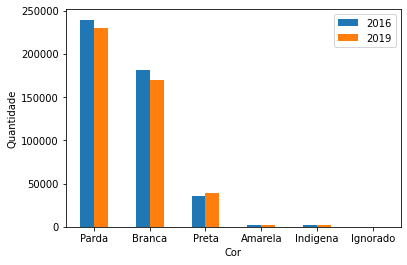

In [17]:
ax = t_cor.plot.bar(x='index', rot=0)

ax.set_xlabel("Cor")
ax.set_ylabel("Quantidade")

# **2. Idade**

In [18]:
age_subset = df.filter(['Ano','Cor','Idade'])

age_2016 = age_subset.loc[age_subset.Ano == 2016].drop(['Ano'],axis=1)
age_2019 = age_subset.loc[age_subset.Ano == 2019].drop(['Ano'],axis=1)

df_age16 = dados(age_2016)
df_age19 = dados(age_2019)

**2016**

In [19]:
age = dados(age_2016)
for i in range(0,len(age)-1):
    print(idade(age[i]))


Distribuição da idade da população Parda

10th Percentile:  7.0

30th Percentile:  18.0

50th Percentile:  30.0

95th Percentile:  69.0

99th Percentile:  82.0
None

Distribuição da idade da população Branca

10th Percentile:  7.0

30th Percentile:  21.0

50th Percentile:  35.0

95th Percentile:  74.0

99th Percentile:  85.0
None

Distribuição da idade da população Preta

10th Percentile:  10.0

30th Percentile:  23.0

50th Percentile:  35.0

95th Percentile:  71.0

99th Percentile:  83.83000000000175
None

Distribuição da idade da população Amarela

10th Percentile:  12.0

30th Percentile:  27.0

50th Percentile:  39.0

95th Percentile:  77.0

99th Percentile:  87.0
None

Distribuição da idade da população Indígena

10th Percentile:  6.0

30th Percentile:  17.0

50th Percentile:  29.0

95th Percentile:  71.0

99th Percentile:  84.0
None


**2019**

In [20]:
age = dados(age_2019)
for i in range(0,len(age)-1):
    print(idade(age[i]))


Distribuição da idade da população Parda

10th Percentile:  7.0

30th Percentile:  19.0

50th Percentile:  32.0

95th Percentile:  71.0

99th Percentile:  83.0
None

Distribuição da idade da população Branca

10th Percentile:  7.0

30th Percentile:  22.0

50th Percentile:  36.0

95th Percentile:  75.0

99th Percentile:  86.0
None

Distribuição da idade da população Preta

10th Percentile:  10.0

30th Percentile:  24.0

50th Percentile:  36.0

95th Percentile:  72.0

99th Percentile:  84.0
None

Distribuição da idade da população Amarela

10th Percentile:  11.0

30th Percentile:  26.0

50th Percentile:  37.0

95th Percentile:  77.0

99th Percentile:  88.0
None

Distribuição da idade da população Indígena

10th Percentile:  7.0

30th Percentile:  18.0

50th Percentile:  30.0

95th Percentile:  70.0

99th Percentile:  83.0
None


# **3. UF**

In [21]:
uf_subset = df.filter(['Ano','Cor','UF'])

uf_2016 = uf_subset.loc[uf_subset.Ano == 2016].drop(['Ano'],axis=1)
uf_2019 = uf_subset.loc[uf_subset.Ano == 2019].drop(['Ano'],axis=1)

**2016**

In [22]:
uf16 = dados(uf_2016)
for i in range(0,len(uf16)-1):
    print(uf16[i].value_counts().head(3))

Cor    UF          
Parda  Maranhão        22285
       Minas Gerais    16853
       Ceará           16807
dtype: int64
Cor     UF               
Branca  Santa Catarina       22751
        São Paulo            21422
        Rio Grande do Sul    19536
dtype: int64
Cor    UF            
Preta  Bahia             4544
       Rio de Janeiro    4489
       Minas Gerais      3463
dtype: int64
Cor      UF       
Amarela  São Paulo    543
         Paraná       230
         Goiás         97
dtype: int64
Cor       UF      
Indígena  Roraima     325
          Amazonas    277
          Bahia       122
dtype: int64


**2019**

In [23]:
uf19 = dados(uf_2019)
for i in range(0,len(uf19)-1):
    print(uf19[i].value_counts().head(3))

Cor    UF          
Parda  Maranhão        21269
       Minas Gerais    16408
       Ceará           15607
dtype: int64
Cor     UF               
Branca  Santa Catarina       21440
        São Paulo            19954
        Rio Grande do Sul    18196
dtype: int64
Cor    UF            
Preta  Bahia             4979
       Rio de Janeiro    4327
       Maranhão          3888
dtype: int64
Cor      UF       
Amarela  São Paulo    528
         Paraná       255
         Maranhão     150
dtype: int64
Cor       UF      
Indígena  Amazonas    515
          Roraima     314
          Maranhão    119
dtype: int64


# **4. Educação Feita**

In [24]:
ef_subset = df.filter(['Ano','Cor','Educação feita'])

In [25]:
ef_2016 = ef_subset.loc[ef_subset.Ano == 2016].drop(['Ano'],axis=1)
ef_2019 = ef_subset.loc[ef_subset.Ano == 2019].drop(['Ano'],axis=1)

**2016**

In [26]:
ef16 = dados(ef_2016)
for i in range(0,len(ef16)-1):
    print(ef16[i].value_counts().head(3))

Cor    Educação feita                             
Parda  Regular do ensino fundamental ou do 1º grau    53790
       Regular do ensino médio ou do 2º grau          49256
       Antigo primário (elementar)                    16526
dtype: int64
Cor     Educação feita                             
Branca  Regular do ensino médio ou do 2º grau          37985
        Regular do ensino fundamental ou do 1º grau    30488
        Superior - graduação                           19871
dtype: int64
Cor    Educação feita                             
Preta  Regular do ensino médio ou do 2º grau          8540
       Regular do ensino fundamental ou do 1º grau    8378
       Antigo primário (elementar)                    2785
dtype: int64
Cor      Educação feita                             
Amarela  Regular do ensino médio ou do 2º grau          425
         Superior - graduação                           413
         Regular do ensino fundamental ou do 1º grau    230
dtype: int64
Cor       Educação fe

In [27]:
ef19 = dados(ef_2019)
for i in range(0,len(ef19)-1):
    print(ef19[i].value_counts().head(3))

Cor    Educação feita                             
Parda  Regular do ensino médio ou do 2º grau          50637
       Regular do ensino fundamental ou do 1º grau    48713
       Antigo primário (elementar)                    15315
dtype: int64
Cor     Educação feita                             
Branca  Regular do ensino médio ou do 2º grau          36108
        Regular do ensino fundamental ou do 1º grau    27035
        Superior - graduação                           19513
dtype: int64
Cor    Educação feita                             
Preta  Regular do ensino médio ou do 2º grau          10002
       Regular do ensino fundamental ou do 1º grau     8962
       Antigo primário (elementar)                     2935
dtype: int64
Cor      Educação feita                             
Amarela  Regular do ensino médio ou do 2º grau          526
         Superior - graduação                           382
         Regular do ensino fundamental ou do 1º grau    343
dtype: int64
Cor       Educação

# **5. Profissão**

In [28]:
p_subset = df.filter(['Ano','Cor','Profissao'])

In [29]:
p_2016 = p_subset.loc[p_subset.Ano == 2016].drop(['Ano'],axis=1)
p_2019 = p_subset.loc[p_subset.Ano == 2019].drop(['Ano'],axis=1)

**2016**

In [30]:
p16 = dados(p_2016)
for i in range(0,len(p16)-1):
    print(p16[i].value_counts().head(3))

Cor    Profissao
Parda  9111.0       5835
       6111.0       5824
       9211.0       4332
dtype: int64
Cor     Profissao
Branca  6111.0       4745
        5223.0       3461
        9111.0       3289
dtype: int64
Cor    Profissao
Preta  9111.0       1304
       6111.0        815
       7112.0        775
dtype: int64
Cor      Profissao
Amarela  5221.0       63
         6111.0       47
         5223.0       42
dtype: int64
Cor       Profissao
Indígena  6111.0       63
          9111.0       60
          9211.0       28
dtype: int64


**2019**

In [31]:
p16 = dados(p_2016)
for i in range(0,len(p16)-1):
    print(p16[i].value_counts().head(3))

Cor    Profissao
Parda  9111.0       5835
       6111.0       5824
       9211.0       4332
dtype: int64
Cor     Profissao
Branca  6111.0       4745
        5223.0       3461
        9111.0       3289
dtype: int64
Cor    Profissao
Preta  9111.0       1304
       6111.0        815
       7112.0        775
dtype: int64
Cor      Profissao
Amarela  5221.0       63
         6111.0       47
         5223.0       42
dtype: int64
Cor       Profissao
Indígena  6111.0       63
          9111.0       60
          9211.0       28
dtype: int64


In [32]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#p16[0].value_counts().head(5)

# **6. Rendimento de trabalho**

In [33]:
rt_subset = df.filter(['Ano','Cor','Redimentos de trabalho'])

In [34]:
rt_2016 = rt_subset.loc[rt_subset.Ano == 2016].drop(['Ano'],axis=1)
rt_2019 = rt_subset.loc[rt_subset.Ano == 2019].drop(['Ano'],axis=1)

In [35]:
rt16 = dados(rt_2016)
for i in range(0,len(rt16)-1):
    print(rend(rt16[i]))


Redimento de trabalho mensal da população Parda em reais
Quantidade de respondentes 90822 de 239357

10th Percentile:  200.0

30th Percentile:  800.0

50th Percentile:  914.5

95th Percentile:  4000.0

99th Percentile:  8839.49999999968
None

Redimento de trabalho mensal da população Branca em reais
Quantidade de respondentes 79271 de 181528

10th Percentile:  500.0

30th Percentile:  1000.0

50th Percentile:  1500.0

95th Percentile:  8000.0

99th Percentile:  17000.0
None

Redimento de trabalho mensal da população Preta em reais
Quantidade de respondentes 16113 de 35218

10th Percentile:  250.0

30th Percentile:  850.0

50th Percentile:  1000.0

95th Percentile:  4000.0

99th Percentile:  8000.0
None

Redimento de trabalho mensal da população Amarela em reais
Quantidade de respondentes 888 de 1922

10th Percentile:  500.0

30th Percentile:  1000.0

50th Percentile:  1800.0

95th Percentile:  10000.0

99th Percentile:  20000.0
None

Redimento de trabalho mensal da população Indígena 

In [36]:
rt19 = dados(rt_2019)
for i in range(0,len(rt19)-1):
    print(rend(rt19[i]))


Redimento de trabalho mensal da população Parda em reais
Quantidade de respondentes 87673 de 229587

10th Percentile:  200.0

30th Percentile:  800.0

50th Percentile:  1000.0

95th Percentile:  5000.0

99th Percentile:  10000.0
None

Redimento de trabalho mensal da população Branca em reais
Quantidade de respondentes 75336 de 170132

10th Percentile:  500.0

30th Percentile:  1000.0

50th Percentile:  1500.0

95th Percentile:  9000.0

99th Percentile:  20000.0
None

Redimento de trabalho mensal da população Preta em reais
Quantidade de respondentes 18110 de 39395

10th Percentile:  250.0

30th Percentile:  954.0

50th Percentile:  1150.0

95th Percentile:  4500.0

99th Percentile:  10000.0
None

Redimento de trabalho mensal da população Amarela em reais
Quantidade de respondentes 1064 de 2282

10th Percentile:  350.0

30th Percentile:  1000.0

50th Percentile:  1500.0

95th Percentile:  12984.99999999999

99th Percentile:  30000.0
None

Redimento de trabalho mensal da população Indíg